In [2]:
from spacerocks.spacerock import SpaceRock
from spacerocks.time import Time
from spacerocks.observing import Observatory
from spacerocks.spice import SpiceKernel
from spacerocks.nbody import Simulation, Integrator, Force


import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

kernel = SpiceKernel()
kernel.load("/Users/kjnapier/data/spice/latest_leapseconds.tls")
kernel.load("/Users/kjnapier/data/spice/de440s.bsp")
kernel.load("/Users/kjnapier/data/spice/sb441-n16s.bsp")

In [3]:
name = 'davidgerdes'

In [4]:
epoch = Time.now()
t0 = epoch.epoch
epochs = np.arange(epoch.epoch, epoch.epoch + 10_000 * 365.25, 10_000)


In [5]:
rock = SpaceRock.from_horizons(name=name, epoch=epoch, frame='ECLIPJ2000', origin='SSB')


In [6]:
sim = Simulation.planets(rock.epoch, "ECLIPJ2000", "SSB")
# sim.set_integrator(Integrator.leapfrog(2.0))
sim.set_integrator(Integrator.ias15(2.0))
sim.add(rock)

sim.move_to_center_of_mass()

In [7]:
snapshots = []
for epoch in epochs:
    t = Time(epoch, 'utc', 'jd')
    sim.integrate(t)
    snapshots.append(sim.particles)

In [8]:
xs = [snapshot.x for snapshot in snapshots]
ys = [snapshot.y for snapshot in snapshots]
names = [snapshot.name for snapshot in snapshots]

In [9]:
xs = np.array(xs).ravel()
ys = np.array(ys).ravel()
names = np.array(names).ravel()

In [10]:
colors = ['crimson' if name == 'davidgerdes' else 'black' for name in names]

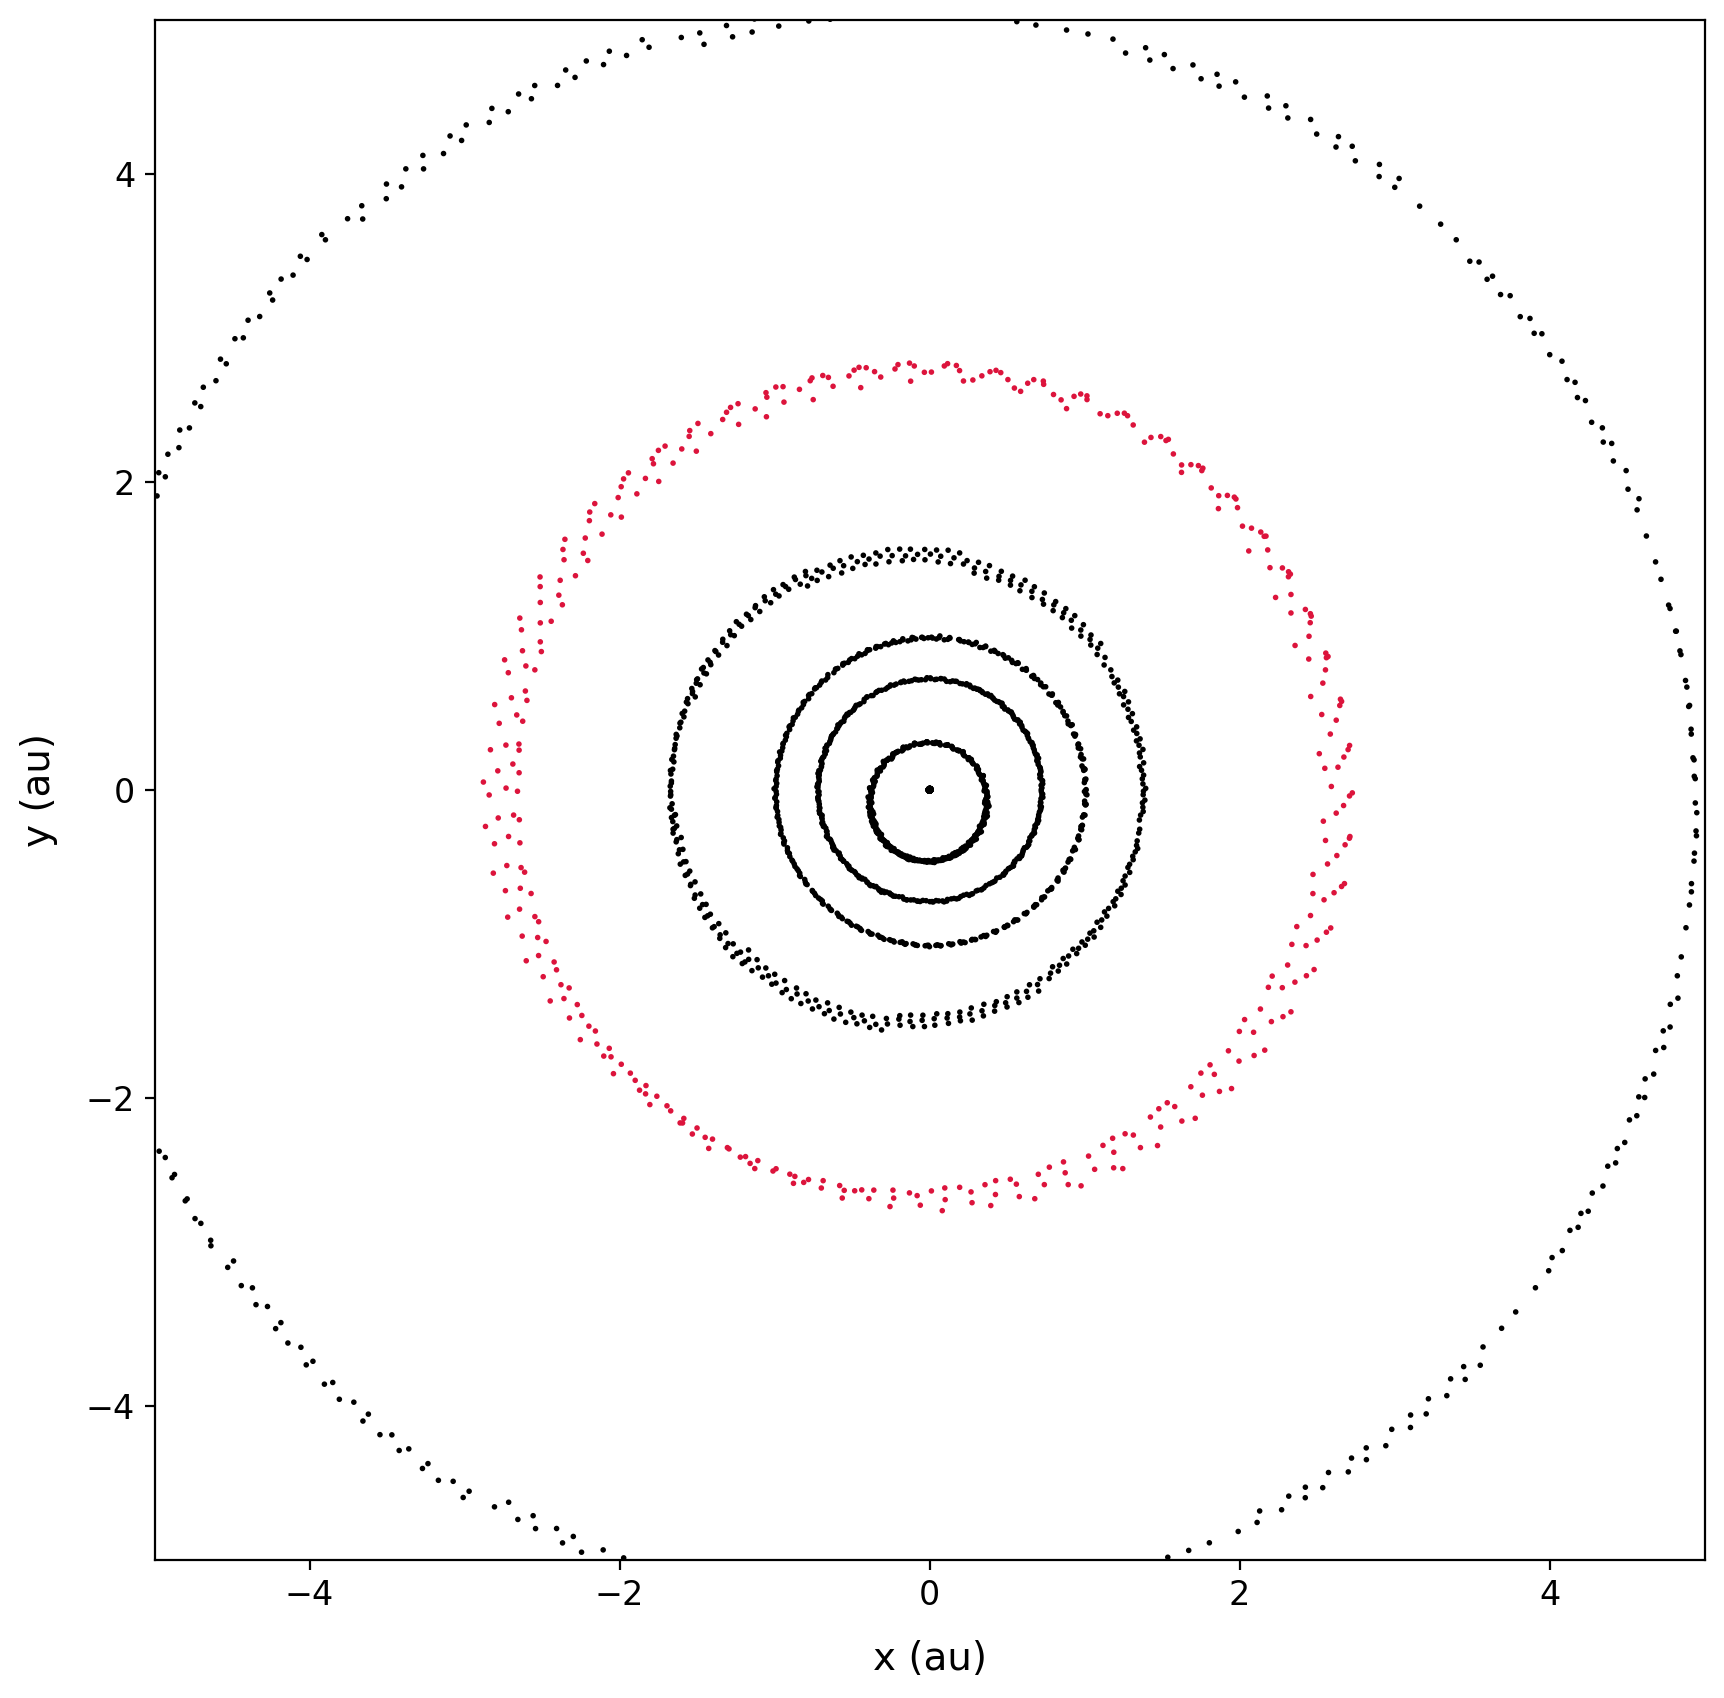

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.scatter(xs, ys, s=1, c=colors)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_xlabel('x (au)', fontsize=14, labelpad=10)
ax.set_ylabel('y (au)', fontsize=14, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=12)

In [109]:
for snapshot in snapshots:
    snapshot.calculate_orbit()

In [110]:
semimajors = [snapshot.a[-1] for snapshot in snapshots]
es = [snapshot.e[-1] for snapshot in snapshots]
incs = [snapshot.inc[-1] for snapshot in snapshots]
eps = [snapshot[9].epoch.epoch for snapshot in snapshots]
eps = (np.array(eps) - eps[0]) / 365.25 + 2024

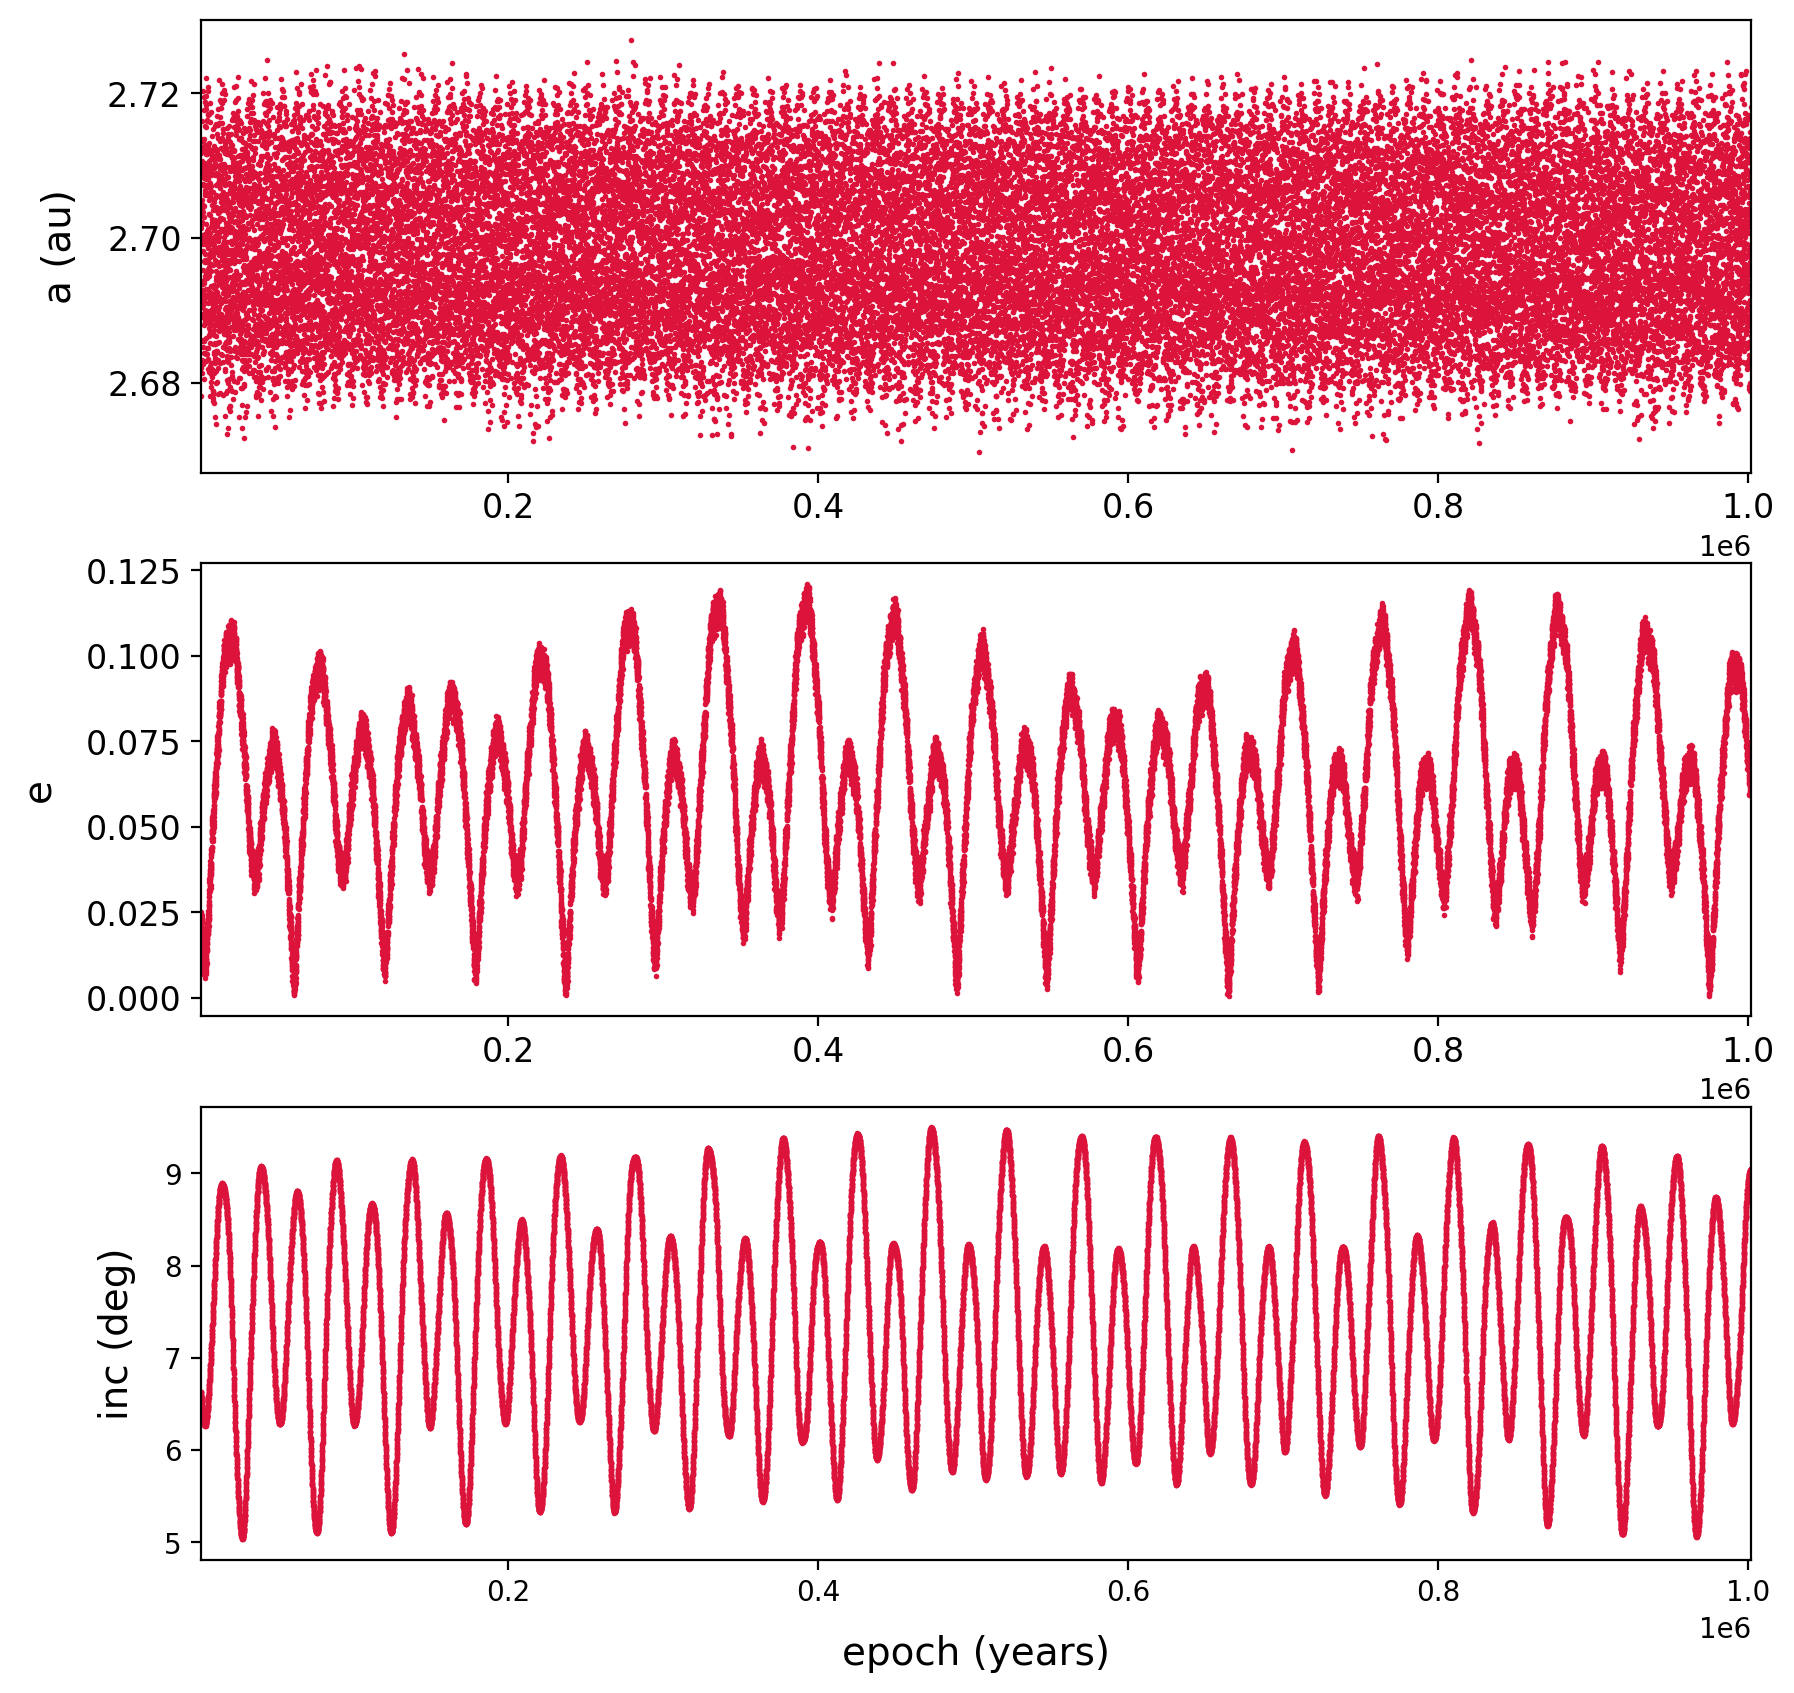

In [111]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].scatter(eps, semimajors, s=1, c='crimson')
ax[0].set_ylabel('a (au)', fontsize=14, labelpad=10)
ax[0].tick_params(axis='both', which='major', labelsize=12)

ax[1].scatter(eps, es, s=1, c='crimson')
ax[1].set_ylabel('e', fontsize=14, labelpad=10)
ax[1].tick_params(axis='both', which='major', labelsize=12)

ax[2].scatter(eps, np.degrees(incs), s=1, c='crimson')
ax[2].set_ylabel('inc (deg)', fontsize=14, labelpad=10)
ax[2].set_xlabel('epoch (years)', fontsize=14, labelpad=10)

for idx in range(3):
    ax[idx].set_xlim([eps.min(), eps.max()])